In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [3]:
# read in the dataset, split as train the first 10 entries and rest as test
series = read_csv('datasets/seriesdat.csv')
series

,t,y
0,1,3
1,2,5
2,3,9
3,4,20
4,5,12
5,6,17
6,7,22
7,8,23
8,9,51
9,10,41


In [4]:
train = series.iloc[0:10]
test = series.iloc[10:]
y_hat = test.copy()

In [5]:
# fit a SES without specifying smooth parameter, so library does it for us
fitx = SimpleExpSmoothing(np.asarray(train['y'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])

optimal alpha chosen: 0.7893447888465914


In [6]:
# fit a SES with explicitly supplied smooth parameter
fit2 = SimpleExpSmoothing(np.asarray(train['y'])).fit(smoothing_level=0.4, optimized=False)

In [7]:
# print the rmse of training step
rms_train_opt = sqrt(mean_squared_error(train['y'], fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)
rms_train = sqrt(mean_squared_error(train['y'], fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  10.370473454370066
rmse for fitted values with supplied alpha:  11.97758663406276


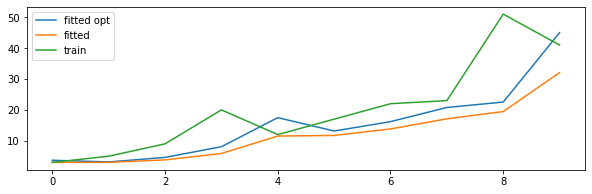

In [8]:
# plot training data against fitted values using both models
plt.figure(figsize=(10,3))
plt.plot(fitx.fittedvalues, label = 'fitted opt')
plt.plot(fit2.fittedvalues, label = 'fitted')
plt.plot(train['y'], label='train')
plt.legend(loc='best')
plt.show()

In [9]:
# forecast using both models
y_hat['SES_opt_fcast'] = fitx.forecast(len(y_hat))
y_hat['SES_fcast'] = fit2.forecast(len(y_hat))

# display forecasted values
y_hat

,t,y,SES_opt_fcast,SES_fcast
10,11,56,41.843246,35.645178
11,12,75,41.843246,35.645178
12,13,60,41.843246,35.645178
13,14,75,41.843246,35.645178
14,15,88,41.843246,35.645178


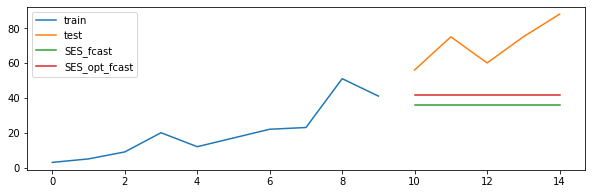

In [10]:
# plot the time series as train, test and forecasted
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['SES_fcast'], label='SES_fcast')
plt.plot(y_hat['SES_opt_fcast'], label='SES_opt_fcast')
plt.legend(loc='best')
plt.show()

In [11]:
# calculate RMSE of the forecast on test data
rms = sqrt(mean_squared_error(test.y, y_hat.SES_fcast)) 
print('rmse for model with supplied alpha: ', rms)
rms_opt = sqrt(mean_squared_error(test.y, y_hat.SES_opt_fcast)) 
print('rmse for model with optimal alpha: ', rms_opt)

rmse for model with supplied alpha:  37.00299290567906
rmse for model with optimal alpha:  31.174566286273574
